# Critical behavior in a chiral molecular model
### Pablo M. Piaggi, Roberto Car, Frank H. Stillinger, and Pablo G. Debenedetti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1000 molecules

In [3]:
data465_1000=np.genfromtxt("SystemSize1000tetramers/T-4.65/thermo.txt")
data46_1000=np.genfromtxt("SystemSize1000tetramers/T-4.6/thermo.txt")
data455_1000=np.genfromtxt("SystemSize1000tetramers/T-4.55/thermo.txt")
data45_1000=np.genfromtxt("SystemSize1000tetramers/T-4.5/thermo.txt")
data445_1000=np.genfromtxt("SystemSize1000tetramers/T-4.45/thermo.txt")
data44_1000=np.genfromtxt("SystemSize1000tetramers/T-4.4/thermo.txt")
data435_1000=np.genfromtxt("SystemSize1000tetramers/T-4.35/thermo.txt")
data43_1000=np.genfromtxt("SystemSize1000tetramers/T-4.3/thermo.txt")
data425_1000=np.genfromtxt("SystemSize1000tetramers/T-4.25/thermo.txt")
data42_1000=np.genfromtxt("SystemSize1000tetramers/T-4.2/thermo.txt")

<ipython-input-4-923472159835>:48: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-4-923472159835>:55: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-4-923472159835>:62: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-4-923472159835>:69: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)


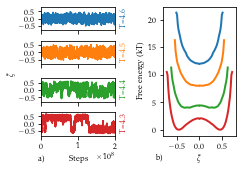

In [4]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.25, 2.25) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

#fig, axs = plt.subplots(4,sharex=True,sharey=True)
fig, axs = plt.subplot_mosaic([['a', 'e'], ['b', 'e'], ['c', 'e'], ['d', 'e']],
                              constrained_layout=True)

axs['a'].plot(data46_1000[:,0],data46_1000[:,10],color=colors[0],label="T=4.6")
axs['b'].plot(data45_1000[:,0],data45_1000[:,10],color=colors[1],label="T=4.5")
axs['c'].plot(data44_1000[:,0],data44_1000[:,10],color=colors[2],label="T=4.4")
axs['d'].plot(data43_1000[:,0],data43_1000[:,10],color=colors[3],label="T=4.3")

axs['a'].set_xticklabels([])
axs['b'].set_xticklabels([])
axs['c'].set_xticklabels([])

axs['a'].set_xlim([0,2.e8])
axs['b'].set_xlim([0,2.e8])
axs['c'].set_xlim([0,2.e8])
axs['d'].set_xlim([0,2.e8])

axs['a'].set_ylim([-0.8,0.8])
axs['b'].set_ylim([-0.8,0.8])
axs['c'].set_ylim([-0.8,0.8])
axs['d'].set_ylim([-0.8,0.8])

axs['c'].set_ylabel(r"$\bar \zeta$")
axs['c'].yaxis.set_label_coords(-0.35, 1.15)
axs['d'].set_xlabel("Steps")

axs['a'].text(2.25e8,0.0,"T=4.6",rotation='vertical',color=colors[0],ha='center',va='center')
axs['b'].text(2.25e8,0.0,"T=4.5",rotation='vertical',color=colors[1],ha='center',va='center')
axs['c'].text(2.25e8,0.0,"T=4.4",rotation='vertical',color=colors[2],ha='center',va='center')
axs['d'].text(2.25e8,0.0,"T=4.3",rotation='vertical',color=colors[3],ha='center',va='center')

shift = 4.

histo,bin_edges=np.histogram(np.abs(data46_1000[:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes) - 3*shift
axs['e'].plot(bin_center,fes,color=colors[0],linewidth=2,label="T=4.6")
axs['e'].plot(-bin_center,fes,color=colors[0],linewidth=2)

histo,bin_edges=np.histogram(np.abs(data45_1000[:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)- 2*shift
axs['e'].plot(bin_center,fes,color=colors[1],linewidth=2,label="T=4.5")
axs['e'].plot(-bin_center,fes,color=colors[1],linewidth=2)

histo,bin_edges=np.histogram(np.abs(data44_1000[:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)- 1*shift
axs['e'].plot(bin_center,fes,color=colors[2],linewidth=2,label="T=4.4")
axs['e'].plot(-bin_center,fes,color=colors[2],linewidth=2)

histo,bin_edges=np.histogram(np.abs(data43_1000[:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)- 0*shift
axs['e'].plot(bin_center,fes,color=colors[3],linewidth=2,label="T=4.3")
axs['e'].plot(-bin_center,fes,color=colors[3],linewidth=2)

axs['e'].set_xlabel(r"$\bar \zeta$")
axs['e'].set_ylabel("Free energy (kT)")
axs['e'].set_xlim([-0.8,0.8])

axs['d'].text(0,-2.5,"a)",ha='center')
axs['e'].text(-0.9,-5.5,"b)",ha='center')

#plt.savefig("Figure1.pdf",bbox_inches='tight')  # publication quality

plt.show()

## 2000 molecules

In [5]:
data455_2000=np.genfromtxt("SystemSize2000tetramers/T-4.55/thermo.txt")
data45_2000=np.genfromtxt("SystemSize2000tetramers/T-4.5/thermo.txt")
data445_2000=np.genfromtxt("SystemSize2000tetramers/T-4.45/thermo.txt")
data44_2000=np.genfromtxt("SystemSize2000tetramers/T-4.4/thermo.txt")
data435_2000=np.genfromtxt("SystemSize2000tetramers/T-4.35/thermo.txt")
data43_2000=np.genfromtxt("SystemSize2000tetramers/T-4.3/thermo.txt")
data425_2000=np.genfromtxt("SystemSize2000tetramers/T-4.25/thermo.txt")
data42_2000=np.genfromtxt("SystemSize2000tetramers/T-4.2/thermo.txt")

## 4000 molecules

In [6]:
data45_4000=np.genfromtxt("SystemSize4000tetramers/T-4.5/thermo.txt")
data445_4000=np.genfromtxt("SystemSize4000tetramers/T-4.45/thermo.txt")
data44_4000=np.genfromtxt("SystemSize4000tetramers/T-4.4/thermo.txt")
data435_4000=np.genfromtxt("SystemSize4000tetramers/T-4.35/thermo.txt")
data43_4000=np.genfromtxt("SystemSize4000tetramers/T-4.3/thermo.txt")
#data425_4000=np.genfromtxt("SystemSize4000tetramers/T-4.25/thermo.txt")
data42_4000=np.genfromtxt("SystemSize4000tetramers/T-4.2/thermo.txt")

## 8000 molecules

In [7]:
data46_8000=np.genfromtxt("SystemSize8000tetramers/T-4.6/thermo.txt")
data455_8000=np.genfromtxt("SystemSize8000tetramers/T-4.55/thermo.txt")
data45_8000=np.genfromtxt("SystemSize8000tetramers/T-4.5/thermo.txt")
data445_8000=np.genfromtxt("SystemSize8000tetramers/T-4.45/thermo.txt")
data44_8000=np.genfromtxt("SystemSize8000tetramers/T-4.4/thermo.txt")
data435_8000=np.genfromtxt("SystemSize8000tetramers/T-4.35/thermo.txt")
data43_8000=np.genfromtxt("SystemSize8000tetramers/T-4.3/thermo.txt")
data425_8000=np.genfromtxt("SystemSize8000tetramers/T-4.25/thermo.txt")
data42_8000=np.genfromtxt("SystemSize8000tetramers/T-4.2/thermo.txt")

## Kinetics and barriers - compare system sizes

<ipython-input-8-c46288573aaa>:80: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-8-c46288573aaa>:72: RuntimeWarning: divide by zero encountered in log
  multi_fes[i,:]=-np.log(histo)
/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
<ipython-input-8-c46288573aaa>:97: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-8-c46288573aaa>:100: RuntimeWarning: invalid value encountered in divide
  feserr = err/histo
<ipython-input-8-c46288573aaa>:120: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-8-c46288573aaa>:72: RuntimeWarning: divide by zero encountered in log
  multi_fes[i,:]=-np.log(histo)
/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
<ipython-inp

1000 [467.60693019  79.37992882   4.35899594] [474.83587671  85.37066228   4.36114704] [1.40430937e+01 4.34650214e-01 1.24474962e-03]
[467.60693019  79.37992882   4.35899594] [1.40430937e+01 4.34650214e-01 1.24474962e-03] 2.386733938787496 0.056478468026929705
2000 [703.70425486 134.81440348   4.36199113] [587.02258391 137.99383827   4.37494191] [2.65109315e+01 2.79704033e+00 1.73249265e-03]


<ipython-input-8-c46288573aaa>:141: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-8-c46288573aaa>:72: RuntimeWarning: divide by zero encountered in log
  multi_fes[i,:]=-np.log(histo)
/home/ppiaggi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
<ipython-input-8-c46288573aaa>:97: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-8-c46288573aaa>:100: RuntimeWarning: invalid value encountered in divide
  feserr = err/histo
/home/ppiaggi/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-8-c46288573aaa>:162: RuntimeWarning: divide by zero encountered in log
  fes=-np.log(histo)
<ipython-input-8-c46288573aaa>:72: RuntimeWarning: divide by zero e

4000 [1010.06278541  208.86132248    4.3634213 ] [1057.98676613  203.90399952    4.35839286] [9.80928276e+00 8.64340123e+00 3.49059395e-03]
8000 [1861.54424988  416.57823797    4.36488076]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


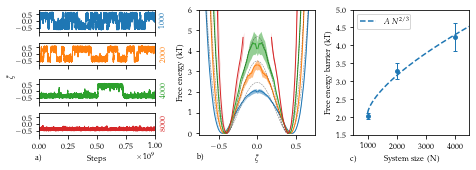

In [8]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (6.5, 2.25) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

fig, axs = plt.subplot_mosaic([['a', 'e', 'f'], ['b', 'e', 'f'], ['c', 'e', 'f'], ['d', 'e', 'f']],
                              constrained_layout=True)

axs['a'].plot(data43_1000[:,0],data43_1000[:,10],color=colors[0],label="N=1000",linewidth=1)
axs['b'].plot(data43_2000[:,0],data43_2000[:,10],color=colors[1],label="N=2000",linewidth=1)
axs['c'].plot(data43_4000[:,0],data43_4000[:,10],color=colors[2],label="N=4000",linewidth=1)
axs['d'].plot(data43_8000[:,0],data43_8000[:,10],color=colors[3],label="N=8000",linewidth=1)

axs['a'].set_xticklabels([])
axs['b'].set_xticklabels([])
axs['c'].set_xticklabels([])

axs['a'].set_xlim([0,1.e9])
axs['b'].set_xlim([0,1.e9])
axs['c'].set_xlim([0,1.e9])
axs['d'].set_xlim([0,1.e9])

axs['a'].set_ylim([-0.85,0.85])
axs['b'].set_ylim([-0.85,0.85])
axs['c'].set_ylim([-0.85,0.85])
axs['d'].set_ylim([-0.85,0.85])

axs['c'].set_ylabel(r"$\bar \zeta$")
axs['c'].yaxis.set_label_coords(-0.2, 1.15)
axs['d'].set_xlabel("Steps")

axs['a'].text(1.075e9,0.0,"1000",rotation='vertical',color=colors[0],ha='center',va='center')
axs['b'].text(1.075e9,0.0,"2000",rotation='vertical',color=colors[1],ha='center',va='center')
axs['c'].text(1.075e9,0.0,"4000",rotation='vertical',color=colors[2],ha='center',va='center')
axs['d'].text(1.075e9,0.0,"8000",rotation='vertical',color=colors[3],ha='center',va='center')

barriers=np.zeros(3)
barriers_errors=np.zeros(3)
barriers_landau=np.zeros(4)
barriers_landau_errors=np.zeros(4)

def landau(x,A,B,Tc):
    T=4.3
    fes = A*(T-Tc)*np.power(x,2)+B*np.power(x,4)
    return fes - np.amin(fes)

shift = 4.

def error_histo(vector,num_blocks):
    ignoreN=0 #int(vector.shape[0]/4)
    myvector=vector[ignoreN:]
    mybins=50
    multi_histo=np.zeros([num_blocks,mybins])
    block_size = int(myvector.shape[0] / num_blocks)
    for i in range(num_blocks):
         multi_histo[i,:] = np.histogram(myvector[block_size*i:block_size*(i+1)],range=(0.,0.8),bins=mybins)[0]
    return np.std(multi_histo,axis=0)

def error_fes(vector,num_blocks,mybins=50):
    ignoreN=0 #int(vector.shape[0]/4)
    myvector=vector[ignoreN:]
    multi_fes=np.zeros([num_blocks,mybins])
    block_size = int(myvector.shape[0] / num_blocks)
    for i in range(num_blocks):
        histo = np.histogram(myvector[block_size*i:block_size*(i+1)],range=(0.,0.8),bins=mybins)[0]
        multi_fes[i,:]=-np.log(histo)
        multi_fes[i,:] -= np.amin(multi_fes[i,:])
    return np.std(multi_fes,axis=0)/np.sqrt(num_blocks)

ignoreN=1000

histo,bin_edges=np.histogram(np.abs(data43_1000[ignoreN:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)
axs['e'].plot(bin_center,fes,color=colors[0],linewidth=1,label="1000")
axs['e'].plot(-bin_center,fes,color=colors[0],linewidth=1)
feserr = error_fes(np.abs(data43_1000[ignoreN:,10]),4) #np.sqrt(histo)
axs['e'].fill_between(bin_edges[:-1],fes-feserr,fes+feserr,color=colors[0],alpha=0.5,linewidth=0)
axs['e'].fill_between(-bin_edges[:-1],fes-feserr,fes+feserr,color=colors[0],alpha=0.5,linewidth=0)

def curve_fit_error(model,vector,p0,num_blocks):
    ignoreN=1000 #int(vector.shape[0]/16)
    myvector=vector[ignoreN:]
    avg_param=np.zeros([len(p0),num_blocks])
    barrier=np.zeros(num_blocks)
    block_size = int(myvector.shape[0] / num_blocks)
    for i in range(num_blocks):
        histo,bin_edges=np.histogram(np.abs(myvector[block_size*i:block_size*(i+1)]),range=(0.,0.8),bins=50)
        bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
        fes=-np.log(histo)
        fes -= np.amin(fes)
        err = error_histo(np.abs(myvector[block_size*i:block_size*(i+1)]),4) #np.sqrt(histo)
        feserr = err/histo
        bin_center=bin_center[np.isfinite(fes)]
        feserr=feserr[np.isfinite(fes)]
        fes=fes[np.isfinite(fes)]
        avg_param[:,i], pcov=curve_fit(model,bin_center,fes,p0=p0) #,sigma=feserr,absolute_sigma=True)
        barrier[i]=np.amax(landau(np.linspace(-0.5,0.5,1000),*avg_param[:,i]))
    return np.mean(avg_param,axis=1), np.std(avg_param,axis=1)/np.sqrt(num_blocks), np.mean(barrier), np.std(barrier)/np.sqrt(num_blocks)

popt2, pcov = curve_fit(landau,bin_center[np.isfinite(fes)],fes[np.isfinite(fes)],p0=[500,80,4.36])
popt, perr, barrier, ebarrier = curve_fit_error(landau,data43_1000[:,10],p0=[500,80,4.36],num_blocks=4)
print("1000",popt,popt2,perr)
barriers_landau[0]=np.amax(landau(np.linspace(-0.5,0.5,1000),*popt2))
barriers[0]=np.mean(fes[:2])
barriers_errors[0]=np.mean(feserr[:2])
print(popt,perr,barrier,ebarrier)
x=np.linspace(-1,1,1000)
axs['e'].plot(x,landau(x,*popt2),'--',color='black',alpha=0.5,linewidth=0.5)

histo,bin_edges=np.histogram(np.abs(data43_2000[ignoreN:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)- 0*shift
axs['e'].plot(bin_center,fes,color=colors[1],linewidth=1,label="2000")
axs['e'].plot(-bin_center,fes,color=colors[1],linewidth=1)
feserr = error_fes(np.abs(data43_2000[ignoreN:,10]),4)
axs['e'].fill_between(bin_edges[:-1],fes-feserr,fes+feserr,color=colors[1],alpha=0.5,linewidth=0)
axs['e'].fill_between(-bin_edges[:-1],fes-feserr,fes+feserr,color=colors[1],alpha=0.5,linewidth=0)
  
popt2, pcov = curve_fit(landau,bin_center[np.isfinite(fes)],fes[np.isfinite(fes)],p0=[800,150,4.36])

popt, perr, barrier, ebarrier = curve_fit_error(landau,data43_2000[:,10],p0=[800,150,4.36],num_blocks=4)
print("2000",popt,popt2,perr)

barriers_landau[1]=np.amax(landau(np.linspace(-0.5,0.5,1000),*popt2))
barriers[1]=np.mean(fes[:2])
barriers_errors[1]=np.mean(feserr[:2])
x=np.linspace(-1,1,1000)
axs['e'].plot(x,landau(x,*popt2),'--',color='black',alpha=0.5,linewidth=0.5)

histo,bin_edges=np.histogram(np.abs(data43_4000[ignoreN:,10]),range=(0.,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)- 0*shift
axs['e'].plot(bin_center,fes,color=colors[2],linewidth=1,label="4000")
axs['e'].plot(-bin_center,fes,color=colors[2],linewidth=1)
feserr = error_fes(np.abs(data43_4000[ignoreN:,10]),4)
axs['e'].fill_between(bin_edges[:-1],fes-feserr,fes+feserr,color=colors[2],alpha=0.5,linewidth=0)
axs['e'].fill_between(-bin_edges[:-1],fes-feserr,fes+feserr,color=colors[2],alpha=0.5,linewidth=0)
    
popt2, pcov = curve_fit(landau,bin_center[np.isfinite(fes)],fes[np.isfinite(fes)],p0=[1000,200,4.36])

popt, perr, barrier, ebarrier = curve_fit_error(landau,data43_4000[:,10],p0=[1000,200,4.36],num_blocks=4)
print("4000",popt,popt2,perr)

barriers_landau[2]=np.amax(landau(np.linspace(-0.5,0.5,1000),*popt2))
barriers[2]=np.mean(fes[:2]) 
barriers_errors[2]=np.mean(feserr[:2])
x=np.linspace(-1,1,1000)
axs['e'].plot(x,landau(x,*popt2),'--',color='black',alpha=0.5,linewidth=0.5)

histo,bin_edges=np.histogram(np.abs(data43_8000[ignoreN:,10]),range=(0.0,0.8),bins=50)
bin_center=(bin_edges[1:]+bin_edges[:-1])/2.0
fes=-np.log(histo)
fes -= np.amin(fes)- 0*shift
feserr = error_fes(np.abs(data43_8000[ignoreN:,10]),4)

bin_edges=bin_edges[:-1]

fes=fes[bin_center>0.17]
bin_edges=bin_edges[bin_center>0.17]
feserr=feserr[bin_center>0.17]
bin_center=bin_center[bin_center>0.17]

bin_center=bin_center[np.isfinite(fes)]
bin_edges=bin_edges[np.isfinite(fes)]
feserr=feserr[np.isfinite(fes)]
fes=fes[np.isfinite(fes)]

axs['e'].plot(bin_center,fes,color=colors[3],linewidth=1,label="8000")
axs['e'].plot(-bin_center,fes,color=colors[3],linewidth=1)
axs['e'].fill_between(bin_edges,fes-feserr,fes+feserr,color=colors[3],alpha=0.5,linewidth=0)
axs['e'].fill_between(-bin_edges,fes-feserr,fes+feserr,color=colors[3],alpha=0.5,linewidth=0)
        
popt2, pcov = curve_fit(landau,bin_center,fes,p0=[1841,840,4.36]) # [800,150,4.36])
print("8000",popt2)
barriers_landau[3]=np.amax(landau(np.linspace(-0.5,0.5,1000),*popt2))

axs['e'].set_xlabel(r"$\bar \zeta$")
axs['e'].set_ylabel("Free energy (kT)")
axs['e'].set_xlim([-0.75,0.75])
axs['e'].set_ylim([-0.1,6])

sizes1=np.array([1000,2000,4000])
sizes2=np.array([1000,2000,4000,8000])

axs['f'].scatter(sizes1,barriers,s=15,zorder=4,color=colors[0])
axs['f'].errorbar(sizes1,barriers,barriers_errors,color=colors[0],linewidth=1.,capsize=2,ls='none')

def func(x,a,b):
    x0=1000
    return a*np.power(x-x0,2./3.)+b
    
popt, pcov = curve_fit(func, sizes1,barriers)
x=np.linspace(0,8000,10000)
axs['f'].plot(x,func(x,*popt),'--',color=colors[0],label=r"$A \: N^{2/3}$")

axs['f'].set_xlim([500,4500])
axs['f'].set_ylim([1.5,5])
axs['f'].legend()
axs['f'].set_xlabel("System size (N)")
axs['f'].set_ylabel("Free energy barrier (kT)")


axs['d'].text(0,-2.7,"a)",ha='center')
axs['e'].text(-0.75,-1.25,"b)",ha='center')
axs['f'].text(500,0.8,"c)",ha='center')

#plt.savefig("Figure4.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Order parameter and Binder cumulant

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


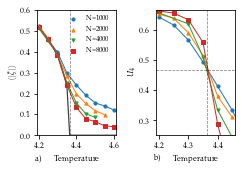

In [9]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.25, 2.25) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

fig, axs = plt.subplot_mosaic([['a', 'b']],
                              constrained_layout=True)
def get_min(x):
    x = x[np.isfinite(x)]
    return np.mean(np.abs(x))

temps_1000=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6,4.65])
eq_zeta_1000=np.zeros(temps_1000.shape[0])
eq_zeta_1000[0]=get_min(data42_1000[:,10])
eq_zeta_1000[1]=get_min(data425_1000[:,10])
eq_zeta_1000[2]=get_min(data43_1000[:100000,10])
eq_zeta_1000[3]=get_min(data435_1000[:,10])
eq_zeta_1000[4]=get_min(data44_1000[:,10])
eq_zeta_1000[5]=get_min(data445_1000[:,10])
eq_zeta_1000[6]=get_min(data45_1000[:,10])
eq_zeta_1000[7]=get_min(data455_1000[:,10])
eq_zeta_1000[8]=get_min(data46_1000[:,10])
eq_zeta_1000[9]=get_min(data465_1000[:,10])

temps_2000=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55])
eq_zeta_2000=np.zeros(temps_2000.shape[0])
eq_zeta_2000[0]=get_min(data42_2000[:,10])
eq_zeta_2000[1]=get_min(data425_2000[:,10])
eq_zeta_2000[2]=get_min(data43_2000[:100000,10])
eq_zeta_2000[3]=get_min(data435_2000[:,10])
eq_zeta_2000[4]=get_min(data44_2000[:,10])
eq_zeta_2000[5]=get_min(data445_2000[:,10])
eq_zeta_2000[6]=get_min(data45_2000[:,10])
eq_zeta_2000[7]=get_min(data455_2000[:,10])

temps_4000=np.array([4.2,4.3,4.35,4.4,4.45,4.5])
eq_zeta_4000=np.zeros(temps_4000.shape[0])
eq_zeta_4000[0]=get_min(data42_4000[:,10])
eq_zeta_4000[1]=get_min(data43_4000[:100000,10])
eq_zeta_4000[2]=get_min(data435_4000[:,10])
eq_zeta_4000[3]=get_min(data44_4000[:,10])
eq_zeta_4000[4]=get_min(data445_4000[:,10])
eq_zeta_4000[5]=get_min(data45_4000[:,10])

temps_8000=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6])
eq_zeta_8000=np.zeros(temps_8000.shape[0])
eq_zeta_8000[0]=get_min(data42_8000[:,10])
eq_zeta_8000[1]=get_min(data425_8000[:,10])
eq_zeta_8000[2]=get_min(data43_8000[:100000,10])
eq_zeta_8000[3]=get_min(data435_8000[:,10])
eq_zeta_8000[4]=get_min(data44_8000[::100000,10])
eq_zeta_8000[5]=get_min(data445_8000[:,10])
eq_zeta_8000[6]=get_min(data45_8000[:,10])
eq_zeta_8000[7]=get_min(data455_8000[:,10])
eq_zeta_8000[8]=get_min(data46_8000[:,10])


temps_inf=np.array([4.2,4.25,4.3,4.35,4.365,4.7])
eq_zeta_inf=np.zeros(temps_inf.shape[0])
eq_zeta_inf[0]=get_min(data42_8000[:,10])
eq_zeta_inf[1]=get_min(data425_8000[:,10])
eq_zeta_inf[2]=get_min(data43_8000[:100000,10])
eq_zeta_inf[3]=get_min(data435_8000[:,10])
eq_zeta_inf[4]=0.001
eq_zeta_inf[5]=0.001

def func(x,a,b):
    return a*np.power(x,2)+b

symbolsize=10

axs["a"].scatter(temps_1000,eq_zeta_1000,color=colors[0],label="N=1000",marker='o',s=symbolsize) 
axs["a"].plot(temps_1000,eq_zeta_1000,color=colors[0],linewidth=1)  

axs["a"].scatter(temps_2000,eq_zeta_2000,color=colors[1],label="N=2000",marker='^',s=symbolsize) 
axs["a"].plot(temps_2000,eq_zeta_2000,color=colors[1],linewidth=1) 

axs["a"].scatter(temps_4000,eq_zeta_4000,color=colors[2],label="N=4000",marker='v',s=symbolsize) 
axs["a"].plot(temps_4000,eq_zeta_4000,color=colors[2],linewidth=1) 

axs["a"].scatter(temps_8000,eq_zeta_8000,color=colors[3],label="N=8000",marker='s',s=symbolsize) 
axs["a"].plot(temps_8000,eq_zeta_8000,color=colors[3],linewidth=1) 

axs["a"].plot(temps_inf,eq_zeta_inf,color='black',zorder=0,linewidth=1.25, alpha=0.75) #,label=r"N=$\infty$") 

axs["a"].plot([4.365,4.365],[0,0.6],'--',color='black',alpha=0.5,linewidth=0.75)

axs["a"].set_xlim([4.19,4.61])
axs["a"].set_ylim([0,0.6])
axs["a"].legend(fontsize=7,frameon=False)
axs["a"].set_ylabel(r"$\langle |\bar\zeta| \rangle$")
axs["a"].set_xlabel("Temperature")


def cumulant(x):
    x = x[np.isfinite(x)]
    return 1-np.mean(np.power(x,4))/(3*np.power(np.mean(np.power(x,2)),2))

bc_1000=np.array([cumulant(data42_1000[:,10]),cumulant(data425_1000[:,10]),cumulant(data43_1000[::100000,10]),cumulant(data435_1000[:,10]),cumulant(data44_1000[:,10]),cumulant(data445_1000[:,10]),cumulant(data45_1000[:,10]),cumulant(data455_1000[:,10]),cumulant(data46_1000[:,10])])
bc_1000_temp=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6])

bc_2000=np.array([cumulant(data42_2000[:,10]),cumulant(data425_2000[:,10]),cumulant(data43_2000[::100000,10]),cumulant(data435_2000[:,10]),cumulant(data44_2000[:,10]),cumulant(data445_2000[:,10])])
bc_2000_temp=np.array([4.2,4.25,4.3,4.35,4.4,4.45])

bc_4000=np.array([cumulant(data42_4000[:,10]),cumulant(data43_4000[::100000,10]),cumulant(data435_4000[:,10]),cumulant(data44_4000[:,10]),cumulant(data445_4000[:,10])])
bc_4000_temp=np.array([4.2,4.3,4.35,4.4,4.45])

bc_8000=np.array([cumulant(data42_8000[:,10]),cumulant(data425_8000[:,10]),cumulant(data43_8000[::100000,10]),cumulant(data435_8000[:,10]),cumulant(data44_8000[:,10]),cumulant(data445_8000[100:,10])])
bc_8000_temp=np.array([4.2,4.25,4.3,4.35,4.4,4.45])

axs["b"].scatter(bc_1000_temp,bc_1000,marker='o',s=symbolsize)
axs["b"].scatter(bc_2000_temp,bc_2000,marker='^',s=symbolsize)
axs["b"].scatter(bc_4000_temp,bc_4000,marker='v',s=symbolsize)
axs["b"].scatter(bc_8000_temp,bc_8000,marker='s',s=symbolsize)

axs["b"].plot(bc_1000_temp,bc_1000,linewidth=1)
axs["b"].plot(bc_2000_temp,bc_2000,linewidth=1)
axs["b"].plot(bc_4000_temp,bc_4000,linewidth=1)
axs["b"].plot(bc_8000_temp,bc_8000,linewidth=1)

axs["b"].plot([4.365,4.365],[0,2./3.],'--',color='black',alpha=0.5,linewidth=0.75)
axs["b"].plot([4.19,4.46],[0.466,0.466],'--',color='black',alpha=0.5,linewidth=0.75)

axs["b"].set_xlabel("Temperature")
axs["b"].set_ylabel("$U_4$")
axs["b"].set_ylim([0.25,2./3.])
axs["b"].set_xlim([4.19,4.46])

axs['a'].text(4.2,-0.12,"a)",ha='center')
axs['b'].text(4.19,0.17,"b)",ha='center')

#plt.savefig("Figure2.pdf",bbox_inches='tight')  # publication quality

plt.show()


## Phase diagrams

No handles with labels found to put in legend.


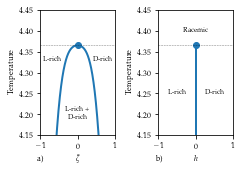

In [10]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.25, 2.25) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

fig, axs = plt.subplot_mosaic([['a', 'b']],
                              constrained_layout=True)
def get_min(x):
    x = x[np.isfinite(x)]
    return np.mean(np.abs(x))

temps_1000=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6,4.65])
eq_zeta_1000=np.zeros(temps_1000.shape[0])
eq_zeta_1000[0]=get_min(data42_1000[:,10])
eq_zeta_1000[1]=get_min(data425_1000[:,10])
eq_zeta_1000[2]=get_min(data43_1000[:100000,10])
eq_zeta_1000[3]=get_min(data435_1000[:,10])
eq_zeta_1000[4]=get_min(data44_1000[:,10])
eq_zeta_1000[5]=get_min(data445_1000[:,10])
eq_zeta_1000[6]=get_min(data45_1000[:,10])
eq_zeta_1000[7]=get_min(data455_1000[:,10])
eq_zeta_1000[8]=get_min(data46_1000[:,10])
eq_zeta_1000[9]=get_min(data465_1000[:,10])

temps_2000=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55])
eq_zeta_2000=np.zeros(temps_2000.shape[0])
eq_zeta_2000[0]=get_min(data42_2000[:,10])
eq_zeta_2000[1]=get_min(data425_2000[:,10])
eq_zeta_2000[2]=get_min(data43_2000[:100000,10])
eq_zeta_2000[3]=get_min(data435_2000[:,10])
eq_zeta_2000[4]=get_min(data44_2000[:,10])
eq_zeta_2000[5]=get_min(data445_2000[:,10])
eq_zeta_2000[6]=get_min(data45_2000[:,10])
eq_zeta_2000[7]=get_min(data455_2000[:,10])

temps_4000=np.array([4.2,4.3,4.35,4.4,4.45,4.5])
eq_zeta_4000=np.zeros(temps_4000.shape[0])
eq_zeta_4000[0]=get_min(data42_4000[:,10])
eq_zeta_4000[1]=get_min(data43_4000[:100000,10])
eq_zeta_4000[2]=get_min(data435_4000[:,10])
eq_zeta_4000[3]=get_min(data44_4000[:,10])
eq_zeta_4000[4]=get_min(data445_4000[:,10])
eq_zeta_4000[5]=get_min(data45_4000[:,10])

temps_8000=np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6])
eq_zeta_8000=np.zeros(temps_8000.shape[0])
eq_zeta_8000[0]=get_min(data42_8000[:,10])
eq_zeta_8000[1]=get_min(data425_8000[:,10])
eq_zeta_8000[2]=get_min(data43_8000[:100000,10])
eq_zeta_8000[3]=get_min(data435_8000[:,10])
eq_zeta_8000[4]=get_min(data44_8000[::100000,10])
eq_zeta_8000[5]=get_min(data445_8000[:,10])
eq_zeta_8000[6]=get_min(data45_8000[:,10])
eq_zeta_8000[7]=get_min(data455_8000[:,10])
eq_zeta_8000[8]=get_min(data46_8000[:,10])


temps_inf=np.array([4.2,4.25,4.3,4.35,4.365,4.7])
eq_zeta_inf=np.zeros(temps_inf.shape[0])
eq_zeta_inf[0]=get_min(data42_8000[:,10])
eq_zeta_inf[1]=get_min(data425_8000[:,10])
eq_zeta_inf[2]=get_min(data43_8000[:100000,10])
eq_zeta_inf[3]=get_min(data435_8000[:,10])
eq_zeta_inf[4]=0.001
eq_zeta_inf[5]=0.001

def func(x,a,b):
    return a*np.power(x,2)+b

symbolsize=10

axs["a"].scatter([0],[4.365],color=colors[0],zorder=0) 

def func(x,a,c):
    b=4.365
    return a*np.power(x,2)+b+c*np.power(x,4)

popt, pcov = curve_fit(func, eq_zeta_inf,temps_inf)
x=np.linspace(-1,1,1000)
axs["a"].plot(x,func(x,*popt),color=colors[0],linewidth=2)
axs["a"].plot([-1,1],[4.365,4.365],'--',color="black",alpha=0.5,linewidth=0.5)

axs["a"].text(0,4.2,"L-rich + \n D-rich",va='center',ha='center',fontsize=7)
axs["a"].text(-0.67,4.33,"L-rich",va='center',ha='center',fontsize=7)
axs["a"].text(0.67,4.33,"D-rich",va='center',ha='center',fontsize=7)


axs["a"].set_ylim([4.15,4.45])
axs["a"].set_xlim([-1,1])
axs["a"].legend(fontsize=7,frameon=False)
axs["a"].set_xlabel(r"$\bar\zeta$")
axs["a"].set_ylabel("Temperature")

axs["b"].plot([0,0],[0,4.365],color=colors[0],zorder=0,linewidth=2) #,label=r"N=$\infty$") 
axs["b"].scatter([0],[4.365],color=colors[0],zorder=0) #,label=r"N=$\infty$") 
axs["b"].plot([-1,1],[4.365,4.365],'--',color="black",alpha=0.5,linewidth=0.5)
axs["b"].set_xlabel(r"$h$")
axs["b"].set_ylabel("Temperature")
axs["b"].set_ylim([4.15,4.45])
axs["b"].set_xlim([-1,1])

axs["b"].text(0,4.4,"Racemic",va='center',ha='center',fontsize=7)
axs["b"].text(-0.5,4.25,"L-rich",va='center',ha='center',fontsize=7)
axs["b"].text(0.5,4.25,"D-rich",va='center',ha='center',fontsize=7)

axs['a'].text(-1,4.09,"a)",ha='center')
axs['b'].text(-1,4.09,"b)",ha='center')

#plt.savefig("Figure5.pdf",bbox_inches='tight')  # publication quality

plt.show()


## Finite-size scaling

/home/ppiaggi/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ppiaggi/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.60780316 1.        ]
[1.48637967 1.        ]


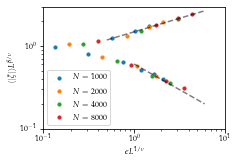

In [11]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.25, 2.25) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page


def scaling_y(x,N):
    x = x[np.isfinite(x)]
    nu = 0.629971
    beta = 0.326419
    L=np.power(N,1./3.)
    return np.mean(np.abs(x))*np.power(L,beta/nu)

def scaling_x(T,N):
    Tc = 4.365
    nu = 0.629971
    L=np.power(N,1./3.)
    return np.power(L,1/nu)*(T-Tc)/Tc

sc_1000=np.array([scaling_y(data42_1000[:,10],1000),scaling_y(data425_1000[:,10],1000),scaling_y(data43_1000[::100000,10],1000),scaling_y(data435_1000[:,10],1000),scaling_y(data44_1000[:,10],1000),scaling_y(data445_1000[:,10],1000),scaling_y(data45_1000[:,10],1000),scaling_y(data455_1000[:,10],1000),scaling_y(data46_1000[:,10],1000)])
sc_1000_x=scaling_x(np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6]),1000)

sc_2000=np.array([scaling_y(data42_2000[:,10],2000),scaling_y(data425_2000[:,10],2000),scaling_y(data43_2000[::100000,10],2000),scaling_y(data435_2000[:,10],2000),scaling_y(data44_2000[:,10],2000),scaling_y(data445_2000[:,10],2000),scaling_y(data45_2000[:,10],2000)])
sc_2000_x=scaling_x(np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5]),2000)

sc_4000=np.array([scaling_y(data42_4000[:,10],4000),scaling_y(data43_4000[::100000,10],4000),scaling_y(data435_4000[:,10],4000),scaling_y(data44_4000[:,10],4000),scaling_y(data445_4000[:,10],4000),scaling_y(data45_4000[:,10],4000)])
sc_4000_x=scaling_x(np.array([4.2,4.3,4.35,4.4,4.45,4.5]),4000)

sc_8000=np.array([scaling_y(data42_8000[:,10],8000),scaling_y(data425_8000[:,10],8000),scaling_y(data43_8000[::100000,10],8000),scaling_y(data435_8000[:,10],8000),scaling_y(data44_8000[:,10],8000),scaling_y(data445_8000[:,10],8000),scaling_y(data45_8000[:,10],8000)])
sc_8000_x=scaling_x(np.array([4.2,4.25,4.3,4.35,4.4,4.45,4.5]),8000)

mysymbolsize=10

plt.scatter(np.abs(sc_1000_x),sc_1000,s=mysymbolsize,label="$N=1000$")
plt.scatter(np.abs(sc_2000_x),sc_2000,s=mysymbolsize,label="$N=2000$")
plt.scatter(np.abs(sc_4000_x),sc_4000,s=mysymbolsize,label="$N=4000$")
plt.scatter(np.abs(sc_8000_x),sc_8000,s=mysymbolsize,label="$N=8000$")

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r"$\langle |\bar\zeta|\rangle L^{\beta/\nu}$")
plt.xlabel(r"$\epsilon L^{1/\nu}$")

def power_law(x,A,B):
    return A*np.power(x,B)

def power_law2(x,A,B):
    nu = 0.629971
    beta = 0.326419
    B=beta
    return A*np.power(x,B)

def power_law3(x,A,B):
    nu = 0.629971
    beta = 0.326419
    B=beta-(3/2)*nu
    return A*np.power(x,B)

sc_x = np.concatenate((sc_1000_x,sc_2000_x,sc_4000_x,sc_8000_x))
sc = np.concatenate((sc_1000,sc_2000,sc_4000,sc_8000))

x_lim=1
popt, pcov = curve_fit(power_law3,np.abs(sc_x[sc_x>x_lim]),sc[sc_x>x_lim])
x=np.linspace(x_lim,6,100)
plt.plot(x,power_law3(x,*popt),'--',color='black',alpha=0.5)
print(popt)
x_lim=0.5
x=np.linspace(x_lim,6,100)
popt, pcov = curve_fit(power_law2,np.abs(sc_x[sc_x<x_lim]),sc[sc_x<x_lim])
plt.plot(x,power_law2(x,*popt),'--',color='black',alpha=0.5)
print(popt)

plt.xlim([0.1,10])
plt.ylim([0.1,3])
plt.legend(fontsize=8)
#plt.savefig("Figure3.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Cluster size distribution

In [12]:
clusters_maj_43_1000 = np.load('Clustering/clusters_maj_43_1000.npy')
clusters_min_43_1000 = np.load('Clustering/clusters_min_43_1000.npy')
clusters_maj_43_2000 = np.load('Clustering/clusters_maj_43_2000.npy')
clusters_min_43_2000 = np.load('Clustering/clusters_min_43_2000.npy')
clusters_maj_43_4000 = np.load('Clustering/clusters_maj_43_4000.npy')
clusters_min_43_4000 = np.load('Clustering/clusters_min_43_4000.npy')
clusters_maj_43_8000 = np.load('Clustering/clusters_maj_43_8000.npy')
clusters_min_43_8000 = np.load('Clustering/clusters_min_43_8000.npy')

<ipython-input-13-358f9b8f4c23>:17: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:24: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:31: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:38: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:45: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:52: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:59: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-13-358f9b8f4c23>:66: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)


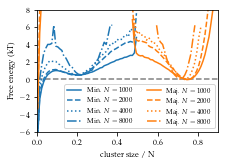

In [13]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.25, 2.25) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

barrier2=np.zeros(4)

num_molecules=1000
histo, bins = np.histogram(clusters_min_43_1000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[10:40]) - 0.5
plt.plot(bin_ctr/num_molecules,fes,linewidth=1.5,label=r"Min. $N=1000$",color=colors[0])

num_molecules=2000
histo, bins = np.histogram(clusters_min_43_2000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[10:40]) - 0.5
plt.plot(bin_ctr/num_molecules,fes,'--',linewidth=1.5,label=r"Min. $N=2000$",color=colors[0])

num_molecules=4000
histo, bins = np.histogram(clusters_min_43_4000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[10:40]) - 0.5
plt.plot(bin_ctr/num_molecules,fes,':',linewidth=1.5,label=r"Min. $N=4000$",color=colors[0])

num_molecules=8000
histo, bins = np.histogram(clusters_min_43_8000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[10:40]) - 0.5
plt.plot(bin_ctr/num_molecules,fes,'-.',linewidth=1.5,label=r"Min. $N=8000$",color=colors[0])

num_molecules=1000
histo, bins = np.histogram(clusters_maj_43_1000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[65:79])
plt.plot(bin_ctr/num_molecules,fes,linewidth=1.5,label=r"Maj. $N=1000$",color=colors[1])

num_molecules=2000
histo, bins = np.histogram(clusters_maj_43_2000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[65:79])
plt.plot(bin_ctr/num_molecules,fes,'--',linewidth=1.5,label=r"Maj. $N=2000$",color=colors[1])

num_molecules=4000
histo, bins = np.histogram(clusters_maj_43_4000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[65:79])
plt.plot(bin_ctr/num_molecules,fes,':',linewidth=1.5,label=r"Maj. $N=4000$",color=colors[1])

num_molecules=8000
histo, bins = np.histogram(clusters_maj_43_8000,bins=100,range=(0,num_molecules))
bin_ctr = (bins[:-1]+bins[1:])/2
fes = -np.log(histo)
fes -= np.amin(fes[65:79])
plt.plot(bin_ctr/num_molecules,fes,'-.',linewidth=1.5,label=r"Maj. $N=8000$",color=colors[1])

plt.legend(fontsize=7,ncol=2)
plt.plot([0,1],[0,0],'--',color='black',alpha=0.5,zorder=0)
plt.xlim([0,0.9])
plt.ylim([-6,8])
plt.xlabel(r"cluster size / N")
plt.ylabel("Free energy (kT)")

#plt.savefig("Figure6.pdf",bbox_inches='tight')  # publication quality

plt.show()